<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/sprint/Sprint_1_ej_respuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción.

En este ejemplo vamos a trabajar con un conjunto de datos formado por un total de 14999 observaciones y 10 variables, consistente en estudiar diversas características de los empleados de una empresa en relación con su decisión de abandonar o no la empresa. Las variables en estudio, se van a describir posteriormente. 


# Presentación de los datos.

En este apartado vamos a familiarizarnos con la estructura que toman estos datos, así como con las diversas características de los mismos y posibles relaciones entre ellos.

Lo primero que hacemos es importar las librerías que vamos a necesitar y los datos en cuestión.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [ ]:
#Descarga manual: https://drive.google.com/file/d/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2022-06-27 17:35:01--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 142.250.188.46, 2607:f8b0:4004:c09::71, 2607:f8b0:4004:c09::64, ...
Connecting to drive.google.com (drive.google.com)|142.250.188.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bmb8vd92geprg0iek5eibdatlf6rklvh/1656351300000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download [following]
--2022-06-27 17:35:02--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bmb8vd92geprg0iek5eibdatlf6rklvh/1656351300000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 172.217.1.193, 2607:f8b0:4004:801::2001
Connecting to doc-08-b0-docs.googleusercontent.co

In [ ]:
# Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

In [ ]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [ ]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#obtenemos información sobre las variables que contiene este data set 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1.

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no.

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla "department", que es lo que hacemos a continuación.

In [ ]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Sprint 1

## Análisis descriptivo de los datos

Veamos a continuación cuántas categorías hay en la variable "department" y cuántos trabajadores hay en cada una de estas categorías.

In [ ]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

Los datos anteriores en formato de gráfico, los obtendremos de la siguiente manera:

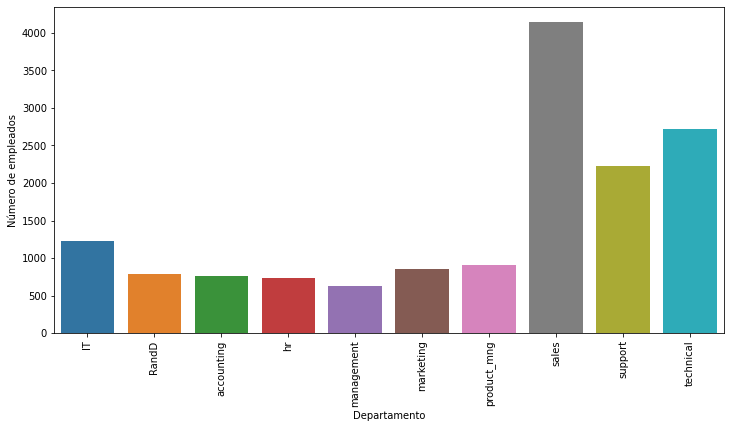

In [ ]:
plt.figure(figsize=(12,6))
data_group = datos.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

plt.xticks(rotation = 90);

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

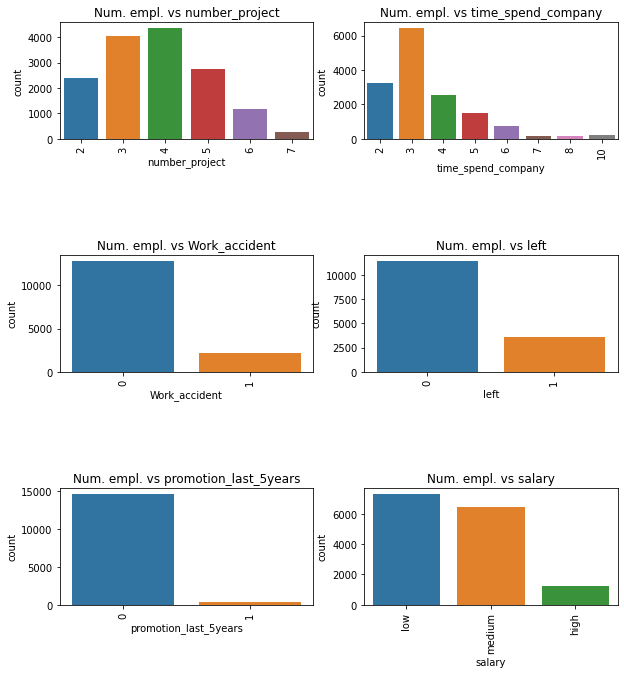

In [ ]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = datos)
    plt.xticks(rotation=90)
    plt.title("Num. empl. vs {}".format(j))

Vemos que lo más común es que los empleados de esta empresa lleven 3 o 4 proyectos en paralelo, aunque hay algunos casos en los que pueden llevar a estar involucrados en hasta 7 proyectos al mismo tiempo. 

Sin embargo, la proporción más predominante en la empresa cobra unos salarios bajos. Destacable este dato junto con el hecho de que en los últimos 5 años ha habido un número reducido de promociones.

In [ ]:
# Veamos resumen estadístico de las variables numéricas
datos.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


La antigüedad promedio en la empresa es de 3 años y medio y, a pesar de que la nota media de las evaluaciones ronda es algo superior al 7, a la hora de promocionar estas buenas evaluaciones la empresa falla, puesto que el número de promociones en los últimos años es muy reducido.

### Estudio de la distribución de los atributos con respecto la variable a predecir

Una de las variables más importantes es la que refleja si un trabajador ha abandonado o no la empresa (**left**). Veamos de forma resumida, cómo se comporta en relación con otras variables.

¿Se mantiene la media igual para ambas categorías?

In [ ]:
left = datos.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Respecto de la variable left, vemos los casos que contiene cada una de sus categorías.

In [ ]:
datos.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Si normalizamos los resultados anteriores....

In [ ]:
datos.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

Es decir, tenemos un 76% de observaciones *No* y un 24% de observaciones *Sí*. 

Ahora representamos esta diferencia de manera visual.

Número de empleados que han abandonado la empresa = 3571
Número de empleados que NO han abandonado la empresa = 11428
Proporción de casos positivos frente a negativos = 31.25%


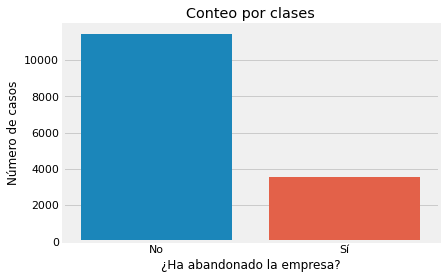

In [ ]:
# Mostramos gráficamente el número de obsercaciones para cada clase
pos = datos[datos["left"] == 1].shape[0]
neg = datos[datos["left"] == 0].shape[0]
print("Número de empleados que han abandonado la empresa = {}".format(pos))
print("Número de empleados que NO han abandonado la empresa = {}".format(neg))
print("Proporción de casos positivos frente a negativos = {:.2f}%".format((pos / neg) * 100))
sns.countplot(datos["left"])
plt.xticks((0, 1), ["No", "Sí"])
plt.xlabel("¿Ha abandonado la empresa?")
plt.ylabel("Número de casos")
plt.title("Conteo por clases");

Vemos que estamos ante un problema desbalanceado, en el que el número de casos perteneciente a la clase 0 (no deja la empresa) es muy superior al número de casos de la clase 1 (sí que se han ido de la empresa). 


Algunos gráficos interesantes son los que se muestran a continuación, en los que estudiamos la relación de la variable **left** con el resto de atributos.

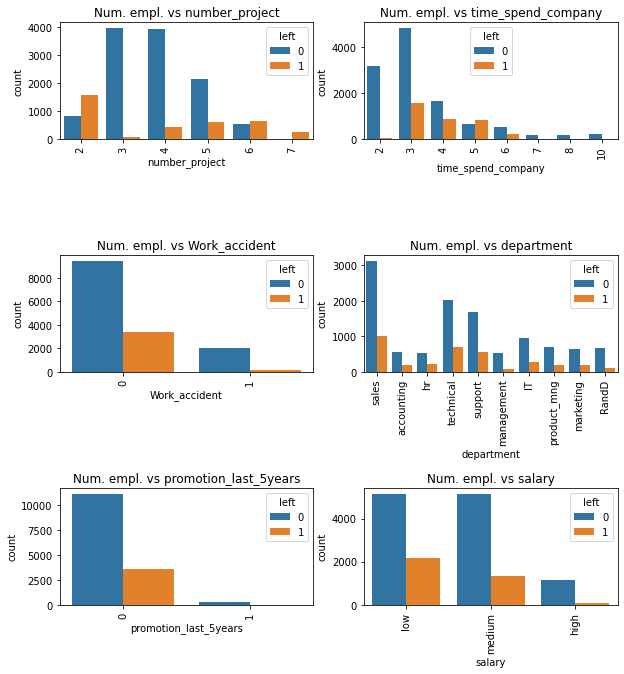

In [ ]:
features=['number_project','time_spend_company','Work_accident','department', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = datos, hue='left')
    plt.xticks(rotation=90)
    plt.title("Num. empl. vs {}".format(j))

Los gráficas anteriores nos aportan unos datos muy interesantes. Algunas de las conlusiones que podemos extraer de las mismas son las siguientes:


*   Ningún empleado que ha sido promocionado en los últimos 5 años ha abandonado la empresa. Por lo tanto, solo se van empleados que no promocionan, ¿existe algún problema de reconocimiento?
*   Del mismo modo, el mayor volúmen de abandonos ocurre en el grupo de empleados que menos cobra.
*   Interesante el dato que podemos extraer del primer gráfico de la izquierda: la proporción de abandono es mayor cuando el empleado está más ocioso (solo dos proyecto) o cuando tiene una carga de trabajo excesiva (6 o 7 proyectos). En el término medio hay más proporción de no abandonos, siendo la carga perfecta la de 3 proyectos en la que casi no hay abandonos.



En las visualizaciones anteriores hemos trabajado solo con variables discretas. A continuación vamos a ver como se distribuye la variable `left` ante el cruce entre la variable `salary` y la variable continua `satisfaction_level`. 

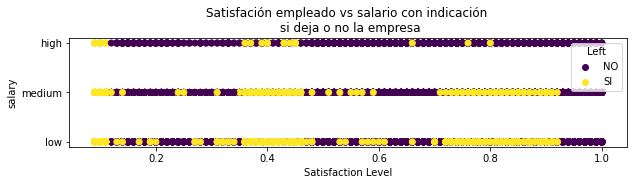

In [ ]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
x = datos['satisfaction_level']
y = datos['salary']
c = datos['left']

scatter = ax.scatter(x=x,y=y,c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('salary')
_ = plt.title('Satisfación empleado vs salario con indicación \n si deja o no la empresa')
plt.legend(handles=scatter.legend_elements()[0], 
           title="Left",
          labels=["NO", "SI"])
plt.show()

Vemos que en los casos de salario bajo y medio la distribución de abandonos es muy similar y prácticamente independiente del nivel de satisfacción, salvo para niveles muy elevados (próximos a uno).

En cambio, para el caso de salarios altos, la mayoría de casos de abandono de la empresa son para niveles de satisfacción por debajo del aprobado (0.5).

Esta gráfica no representa bien el número de empleados en cada nivel, por lo que en apartados posteriores continuaremos con el estudio de la variable `stisfaction_level` con una aproximación diferente.

### Correlación entre variables

La correlación entre las variables, junto a su representación gráfica, se obtiene de la siguiente manera

<AxesSubplot:>

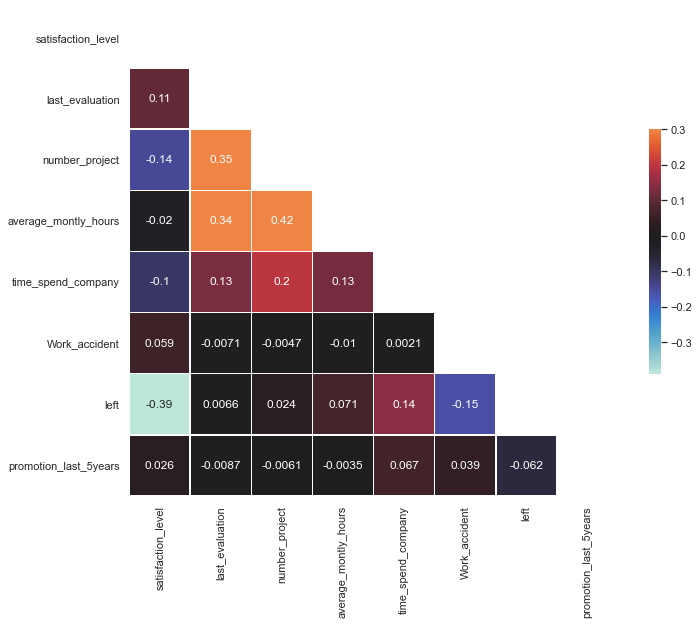

In [ ]:
sns.set(style="white")

corr = datos.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

vf, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Esta matriz de correlación nos dice que cuanto más satisfecha esté una persona en su trabajo, menos probable será que se vaya (correlación negativa entre variable `left`y `satisfaction_level`). Esto ya lo pudimos adelantar en ánalisis previos.

Otra correlación negativa que tiene sentido es la que relaciona `salary`con `left`, ya que nos indica que un salario más alto parece estar asociado negativamente con el abandono. 

Ahora vamos a centrarnos en los  valores de correlación positivos más relevantes:

*   `average_monthly_hours` y `number_project`: tiene sentido, ya que a mayor carga de trabajo mayor número de horas dedicadas.
*   `number_poject` y `last_evaluation`: cuantos más proyectos, mejor es tu valoración en la empresa.
*   El tiempo de permanencia en la empresa (`time_spend_company`) tiene una correlación positiva con el abandono, lo que sugiere que cuanto más tiempo se trabaje en la organización, más probable es que se abandone. 


Para continuar, analicemos más detenidamente la variable de nivel de satisfacción, que es la que tiene el coeficiente más alto.

### Recodificación de variables

Para un mejor estudio de la variable `satisfaction_level` vamos a recodificarla en tres niveles o categorías: Alta, media y baja. Guardamos esta información en una columna denominada "Sat".

In [ ]:
def sat(row):
    if .3 <= row['satisfaction_level'] < .5:
        return 'Medio'
    elif row['satisfaction_level'] >= .5:
        return 'Alto'
    else:
        return 'Bajo'

datos['Sat'] = datos.apply(sat, axis=1)

data_gr = datos.groupby(by='Sat',as_index=False).mean()
data_gr.head()

,Sat,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,Alto,0.748778,0.740814,3.814324,204.656394,3.412154,0.161866,0.098310,0.024386
1,Bajo,0.152213,0.781651,5.291272,236.805468,4.288644,0.117245,0.496845,0.012093
2,Medio,0.411455,0.573588,2.703469,161.674375,3.271913,0.096979,0.597538,0.015666


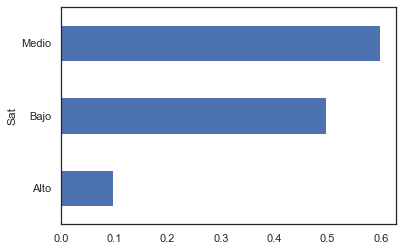

In [ ]:
data_group = datos.groupby(by=['Sat'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

El gráfico anterior muestra un valor medio de la variable left en el eje horizontal. Cuanto más cerca de 1 está el valor mayor proporción de personas se han ido anterior.

Tras esta aclaración, podemos deducir del gráfico que los que tienen un nivel de satisfacción medio son más propensos a marcharse según el porcentaje de los que se marcharon si utilizamos nuestro desglose en tres categorías. También podemos observar que los que están muy satisfechos son los menos propensos a irse, lo que tiene un sentido.

A continuación cruzamos las variables `salary` y la creada anteriormente `Sat`, y vemos para cada cruce de estas dos categorías, el porcentaje de abandono de los trabajadores

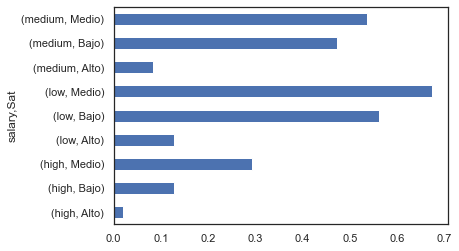

In [ ]:
# Set a default value
data_group = datos.groupby(by=['salary','Sat'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

Podemos ver que los trabajadores con mayor nivel de abandono, tienen un salario bajo y un nivel de satisfacción medio. En el lado opuesto se sitúan los trabajadores con ingresos altos y satisfacción también alta.

### Bonus: Visualización de la relación entre tres variables continuas

En este caso veremos como se distribuye la variable `left` en función de las variables nivel de satisfacción, última evaluación y el número medio de horas trabajadas (todas variables continuas)

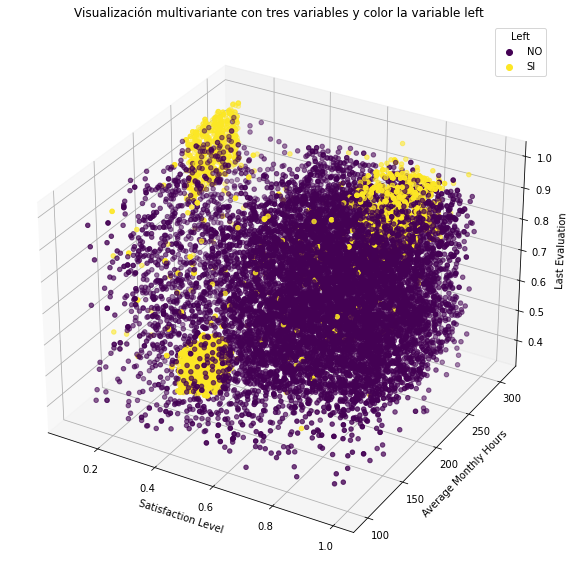

In [ ]:
## There is some definite clusters where people leave.
## It would be interesting to see if clusters to the top left and right that hold on
# .. eventually end up in the cluster at the borrom left

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = datos['satisfaction_level']
y = datos['average_montly_hours']
z = datos['last_evaluation']
c = datos['left']
scatter = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Visualización multivariante con tres variables y color la variable left')

plt.legend(handles=scatter.legend_elements()[0], 
           title="Left",
          labels=["NO", "SI"])
plt.show()

En esta visualización podemos distinguir claramente 3 bloques amarillos (abandonan la empresa):

*   Los que tienen un nivel de satisfación bajo, la última evaluación que recibieron fue regular y trabajaron un número de horas inferior a la media.
Podríamos calificar a este grupo como el de los desmotivados.
*   Por otro lado, tenemos al grupo que en la última evaluación recibieron notas bastante elevadas pero sin embargo su nivel de satisfacción es muy bajo. Esto puede deberse a que el número de horas mensuales que dedican al trabajo es muy elevado. Podríamos considerar este grupo como el de los que sufren el famoso burnout de tanto trabajar.
*  Por último, encontramos otro grupo que tiene valores elevados para las tres variables, es decir, tienen evaluaciones muy positivas, nivel de satisfacción elevado y trabajan muchas horas. El motivo por el que estos empleados abandonan la empresa puede ser porque reciben mejores ofertas de otras compañías.



Antes de finalizar el análisis descriptivo eliminamos la variable `Sat` que hemos creado para que no influya en el análisis posterior.

In [ ]:
datos = datos.loc[:, datos.columns != "Sat"]

In [ ]:
datos.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

## Análisis predictivo

### Preparación de datos

In [ ]:
import os

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix,
                             classification_report)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from warnings import filterwarnings

sns.set_context("notebook")
plt.style.use("fivethirtyeight")
filterwarnings("ignore")

%matplotlib inline

Imprimimos de nuevo los datos para observar su forma y el tipo de cada columna.

In [ ]:
datos.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [ ]:
datos

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Existen algunas variables que son de tipo categórico con categorías en formato literal. Como hemos visto en la teoría, hay algunos métodos que no admiten esta codificación de las categorías, por lo que las transformamos a formato numérico.

La variable salario sí que podemos considerarla como de tipo ordinal. Sin embargo, esto no aplica a la variable "sales" (renombrada a "department" para mayor claridad). Para este caso implementamos el método de *get_dummies()* de pandas.

In [ ]:
# Rename sales feature into department
data = datos.rename(columns={"sales": "department"})

# Map salary into integers
salary_map = {"low": 0, "medium": 1, "high": 2}
data["salary"] = data["salary"].map(salary_map)

# Create dummy variables for department feature
data = pd.get_dummies(data, columns=["department"], drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Una vez transformadas las variables categóricas a tipo dummy realizamos la partición en train y test.

Empleamos el parámetro `stratify=y`para garantizar que la proporción de la variable `left`se mantenga tanto en la partición de train como en la de test. Es decir, en ambas particiones conservamos aproximadamente la proporción de 24% observaciones de la categoría *Sí* y el 76% restante de la categoría *No*.

In [ ]:
# Convert dataframe into numpy objects and split them into
# train and test sets: 80/20
X = data.loc[:, data.columns != "left"].values
y = data.loc[:, data.columns == "left"].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123)

In [ ]:
print(f'Tamaño datos entrenamiento: {X_train.shape[0]} muestras \nTamaño datos test: {X_test.shape[0]} muestras')

Tamaño datos entrenamiento: 11999 muestras 
Tamaño datos test: 3000 muestras


### KNN

Si no conocemos cómo funciona un determinado comando siempre podemos acceder a la ayuda mediante el comando `pkg.method?`.

In [ ]:
# Imprimimos la ayuda del método make_pipelina
make_pipeline?

En las siguientes celdas vamos a evaluar el método KNN mediante validación cruzada (CV), empleando como métrica de evaluación el f1-score, para escoger la combinación más optima de hiperparámetros.

Empleamos el f1-score para evaluar la calidad de las predicciones, ya que el accuracy no es el más adecuado para datasets con clases desbalanceadas (más adelante lo veremos para nuestro ejemplo).

Una vez finalizado, elegiremos el que tenga la puntuación del f1-score más alta.

In [ ]:
# Construimos un clasificador KNN
#Estandarizamos los datos para que no de más peso a una variable que a otra al calcular la distancia entre puntos
pip_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
hyperparam_range = range(3, 15, 2)

gs_knn = GridSearchCV(pip_knn,
                      param_grid={"kneighborsclassifier__n_neighbors": hyperparam_range,
                                  "kneighborsclassifier__weights": ["uniform", "distance"]},
                      scoring="f1",
                      cv=10,
                      n_jobs=-1)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(3, 15, 2),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='f1')

In [ ]:
print("\033[1m" + "\033[0m" + "Los mejores hiperparámetros:")
print("-" * 25)
for hyperparam in gs_knn.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_knn.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "La mejor f1-score del CV de 10 folds: {:.2f}%.".format((gs_knn.best_score_) * 100))

Los mejores hiperparámetros:
-------------------------
n_neighbors :  7
weights :  distance
La mejor f1-score del CV de 10 folds: 92.36%.


In [ ]:
gs_knn.best_params_

{'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__weights': 'distance'}

In [ ]:
# Reajustar KNN usando los mejores hiperparámetros
clf_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors = 7,
                                             weights = "distance"))


clf_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

In [ ]:
y_pred= clf_knn.predict(X_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[2201,   85],
       [  19,  695]])

In [ ]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.9653333333333334


In [ ]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.99      0.96      0.98      2286
          Sí       0.89      0.97      0.93       714

    accuracy                           0.97      3000
   macro avg       0.94      0.97      0.95      3000
weighted avg       0.97      0.97      0.97      3000



El algoritmo predice muy bien los casos en los que el empleado no se ha ido. Sin embargo, la precisión disminuye en el caso de los que sí que se han ido. Este hecho lo podemos apreciar gracias a la métrica `precision`, puesto que su valor se reduce notablemente para los casos que sí que abandonan la empresa. Este hecho lo que nos viene a decir que, de entre todos los casos que nuestro algoritmo predice como Sí, solo acierta un 89% de las veces.


Como nuestro objetivo es tratar de predecir lo mejor posible los casos de alta propensión a abandonar la empresa, en las siguientes secciones emplearemos otros algoritmos para tratar de mejorar este aspecto.

### Regresión logística

In [ ]:
# Build logistic model classifier
#Estandarizamos los datos para que no de más peso a una variable que a otra al calcular la distancia entre puntos
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))

hyperparam_range = np.arange(0.5, 20.1, 0.5)

hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }

gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-1)

gs_logmodel.fit(X_train, y_train)

print("\033[1m" + "\033[0m" + "Los mejores hiperparámetros:")
print("-" * 25)
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "La mejor f1-score del CV de 2 folds: {:.2f}%.".format((gs_logmodel.best_score_) * 100))

Los mejores hiperparámetros:
-------------------------
C :  1.5
fit_intercept :  True
penalty :  l2
La mejor f1-score del CV de 10 folds: 75.85%.


In [ ]:
# Reajustar KNN usando los mejores hiperparámetros
clf_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(class_weight="balanced",
                                          C=1.5, penalty="l2", 
                                          fit_intercept=True))


clf_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.5, class_weight='balanced'))])

In [ ]:
y_pred= clf_lr.predict(X_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[1711,  575],
       [ 140,  574]])

In [ ]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.7616666666666667


In [ ]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.92      0.75      0.83      2286
          Sí       0.50      0.80      0.62       714

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.82      0.76      0.78      3000



En este caso hemos reducido mucho la tasa de aciertos para la clase *Sí*, tanto que hemos llegado al punto en que una moneda podría acertar el mismo número de veces. Por tanto, descartamos el método de regresión logística.

Este ejemplo es my interesante porque a nivel global, el modelo obtiene un accuracy del 76%, el cual, a priori, no parece tan malo. Pero al estar trabajando con datos desbalanceados, es muy importante fijarse en otras métricas diferentes al accuracy, ya que sino podríamos perdernos estos detalles tan importantes y que al final marcan la diferencia entre el éxito o el fracaso de un proyecto.